# Initial requirements
1. Numpy : Numpy is a library for linear algebra in Python. It allows us to work with matrices, arrays etc.
2. Pandas: Pandas is used for data manipulation in Python.
3. Spacy : Spacy is used for tokenization. It basically breaks a sentences into chunks, lematizes it ie changes its form from different verb forms to the normal form.

In [ ]:
!pip install numpy pandas tensorflow

Libraries that we are importing can be seen here

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from imblearn.over_sampling import SMOTE
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Loading the Dataset
We're going to perform a series of steps to load the dataset, as we're doing this through google collab, we'll need to store the dataset in our google drive. When we initially, download the dataset from kaggle, they are in zipped, so their are a few steps involved with unizipping as well.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
 97% 25.0M/25.7M [00:02<00:00, 21.7MB/s]
100% 25.7M/25.7M [00:02<00:00, 12.1MB/s]


In [ ]:
import zipfile
file_path = '/content/imdb-dataset-of-50k-movie-reviews.zip'

In [ ]:
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/kaggle/IMDB Dataset.csv')

# Visualizing the dataset

This is the sample of the dataset that we've loaded. We're going to use seaborn to get an initial idea on how well the data is spread.

<ipython-input-10-057fa1a9fab1>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)


Text(0.5, 1.0, 'Sentiment distribution')

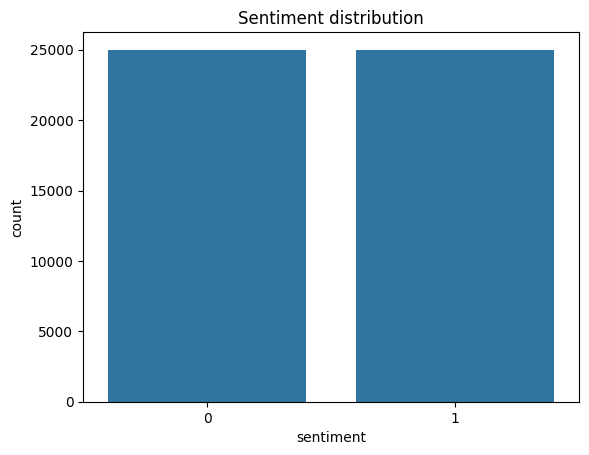

In [ ]:
data.head(20)
data.replace({"sentiment": {"positive": 1, "negative": 0}}, inplace=True)
sns.countplot(x='sentiment', data=data)
plt.title("Sentiment distribution")

In [ ]:
for i in range(5):
    print("Review: ", [i])
    print(data['review'].iloc[i], "\n")
    print("Sentiment: ", data['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

# Number of duplicate datasets

In [ ]:
duplicated_count = data.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  418


# Dividing data into training and testing data

In [ ]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [ ]:
print(train_data.shape)
print(test_data.shape)

(40000, 2)
(10000, 2)


In [ ]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(train_data["review"])
X_train = pad_sequences(tokenizer.texts_to_sequences(train_data["review"]), maxlen=200)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_data["review"]), maxlen=200)

In [ ]:
print(X_train)

[[1935    1 1200 ...  205  351 3856]
 [   3 1651  595 ...   89  103    9]
 [   0    0    0 ...    2  710   62]
 ...
 [   0    0    0 ... 1641    2  603]
 [   0    0    0 ...  245  103  125]
 [   0    0    0 ...   70   73 2062]]


In [ ]:
print(X_test)

[[   0    0    0 ...  995  719  155]
 [  12  162   59 ...  380    7    7]
 [   0    0    0 ...   50 1088   96]
 ...
 [   0    0    0 ...  125  200 3241]
 [   0    0    0 ... 1066    1 2305]
 [   0    0    0 ...    1  332   27]]


In [ ]:
Y_train = train_data["sentiment"]
Y_test = test_data["sentiment"]

In [ ]:
print(Y_train)

39087    0
30893    0
45278    1
16398    0
13653    0
        ..
11284    1
44732    1
38158    0
860      1
15795    1
Name: sentiment, Length: 40000, dtype: int64


# Long Short Term Memory (LSTM)

In [ ]:

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=128, input_length=200))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
model.fit(X_train, Y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 174s 329ms/step - accuracy: 0.7397 - loss: 0.5148 - val_accuracy: 0.8335 - val_loss: 0.3791
Epoch 2/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 302ms/step - accuracy: 0.8573 - loss: 0.3449 - val_accuracy: 0.8601 - val_loss: 0.3439
Epoch 3/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 213s 324ms/step - accuracy: 0.8741 - loss: 0.3100 - val_accuracy: 0.8541 - val_loss: 0.3408
Epoch 4/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 202s 325ms/step - accuracy: 0.8826 - loss: 0.2912 - val_accuracy: 0.8627 - val_loss: 0.3335
Epoch 5/5
500/500 ━━━━━━━━━━━━━━━━━━━━ 201s 323ms/step - accuracy: 0.8923 - loss: 0.2696 - val_accuracy: 0.8614 - val_loss: 0.3566


In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 104ms/step - accuracy: 0.8655 - loss: 0.3468
Test Loss: 0.34103503823280334
Test Accuracy: 0.8675000071525574


# Building a prediction system

In [ ]:
def predict_sentiment(review):
  # tokenize and pad the review
  sequence = tokenizer.texts_to_sequences([review])
  padded_sequence = pad_sequences(sequence, maxlen=200)
  prediction = model.predict(padded_sequence)
  sentiment = "positive" if prediction[0][0] > 0.5 else "negative"
  return sentiment

In [ ]:
new_review = "This movie was fantastic. I loved it."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
The sentiment of the review is: positive


In [ ]:
# example usage
new_review = "This movie was ok but not that good."
sentiment = predict_sentiment(new_review)
print(f"The sentiment of the review is: {sentiment}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
The sentiment of the review is: negative
